In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import sys
from astropy.cosmology import Planck15
import os

from matplotlib import rc_file
rc_file(os.environ['WORK_DIR']+'/code/matplotlibrc')

%matplotlib inline

import seaborn as sns

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4,4)

sys.path.append('../')
import bubbles

# Gunn-Peterson optical depth

$$ \tau_{GP} = \int_0^{z^s} dz c\frac{dt}{dz} n_{HI}(z) \sigma_\alpha(z) $$

Optical depth $\sigma_\alpha(z) = \sigma_0 \phi\left(\nu\frac{1+z}{1+z_s} - \nu_\alpha\right) $

where $\nu$ is emitted frequency. $\sigma_0 = \frac{f \pi e^2}{m_e c}$.

As cross-section is tightly peaked:

\begin{align}
\sigma_\alpha(z) &= \sigma_0 \phi\left(\nu\frac{1+z}{1+z_s} - \nu_\alpha\right) \\
                 &= \sigma_0 \delta\left(\nu\frac{1+z}{1+z_s} - \nu_\alpha\right) \\
                 &\approx \sigma_0 \frac{1+z_s}{\nu} \delta(z - z_s) 
\end{align}

Thus the optical depth:

\begin{align}
\tau_{GP} &= c\frac{dt}{dz}(z_s) n_{HI}(z_s) \sigma_0 \frac{1+z_s}{\nu}  \\
          &= \frac{c}{H(z_s)(1+z_s)} n_{HI}(z_s) \sigma_0 \frac{1+z_s}{\nu} \\
          &= \frac{n_{HI}(z_s)}{H(z_s)} \frac{c \sigma_0}{\nu} \\ 
          &= \boxed{\frac{n_{HI}(z_s)}{H(z_s)} \sigma_0 \lambda_\alpha}
\end{align}



## Cross-section

$$ \sigma = f \frac{\pi e^2}{m_e c} $$


In [ ]:
# Cross-section
electron_charge = 4.8e-10 * u.esu.decompose()
sigma0 = (np.pi * electron_charge**2. / const.m_e / const.c).to(u.cm**2./u.s)

f_lya = 0.416

print(f_lya * sigma0)

In [10]:
print(bubbles.n_H(0))
print((sigma0 * 1216. * u.Angstrom).to(u.cm**3./u.s))
print(Planck15.H0.to(1/u.s))

1.8783608831997029e-07 1 / cm3
1.340755419784846e-07 cm3 / s
2.1953038906868123e-18 1 / s


In [11]:
tauGP_prefactor = (bubbles.n_H(0) * sigma0 * 1216. * u.Angstrom / np.sqrt(Planck15.Om0)/Planck15.H0).to(u.s/u.s).value
tauGP_prefactor

20687.660931316623

In [12]:
print('%.1e' % (tauGP_prefactor*10**1.5))

6.5e+05


In [13]:
z = 7
print((1*u.Mpc*Planck15.H(z)/(1+z)).to(u.km/u.s))

106.83125364753633 km / s


# If background dominates


In [24]:
gamma_BG_lim = (sigma0 * 1216. * u.Angstrom) * bubbles.n_H(0)**2. * bubbles.alpha_rec_B(T=1e4) / (Planck15.H0 * np.sqrt(Planck15.Om0))
gamma_BG_lim.to(1/u.s)*(8)**4.5 * 3**2./2.3

<Quantity 4.56577129e-11 1 / s>

In [21]:
(10)**4.5

31622.776601683792

# What is drop in xHI z=6 --> z=7 if only due to resonant absorption

In [73]:
def xHI_z2(x1, drop=0.5, C=1, z1=6., z2=7., R=1):
    """
    Drop in xHI 
    """
    A = 1.34e-7*u.cm**3./u.s
    
    xHI = - np.log(drop*np.exp(-tau(x1, z=z1, C=C)) - R*(1-drop)) * Planck15.H(z=z2)/bubbles.n_H(z=z2) /A/C
    return xHI.to(u.s/u.s)

def tau(xHI, z, C=1):
    A = 1.34e-7*u.cm**3./u.s
    tau_GP = A*C*xHI * bubbles.n_H(z)/Planck15.H(z)
    return tau_GP.to(u.s/u.s)

In [56]:
print(tau(1e-2, z=6))
print(tau(1e-2, z=7))

3804.6958200664785
4652.817606751363


In [84]:
def A(x1, drop=0.5, R=0.5, z1=6., C=1):
    return drop*(np.exp(-tau(x1, z=z1, C=C)) + R) - R

A(xHI_tab)

<Quantity [ 0.24810127,  0.24770952,  0.24723718,  0.24666776,  0.24598145,
            0.24515448,  0.24415834,  0.24295887,  0.24151523,  0.23977869,
            0.23769122,  0.23518391,  0.23217526,  0.22856929,  0.22425352,
            0.21909706,  0.21294889,  0.20563653,  0.19696565,  0.18672113,
            0.17467028,  0.16056934,  0.14417446,  0.12525858,  0.10363572,
            0.07919379,  0.05193605,  0.0220295 , -0.01014458, -0.04394723,
           -0.07846014, -0.1125046 , -0.14472063, -0.17371804, -0.19829105,
           -0.21765618, -0.23163978, -0.24072932, -0.24593579, -0.24849762,
           -0.24954793, -0.24989388, -0.24998154, -0.24999776, -0.24999982,
           -0.24999999, -0.25      , -0.25      , -0.25      , -0.25      ]>

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


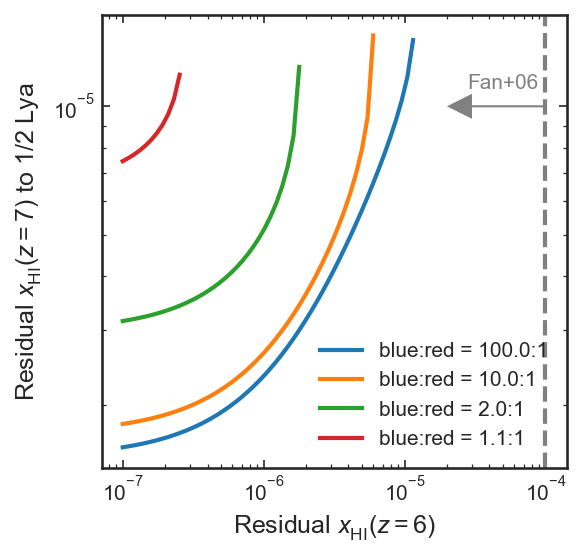

In [146]:
xHI_lab = r'$x_\mathrm{HI}$'
xHI_tab = np.logspace(-7, -3, 100)

for R in [0.01, 0.1, 0.5, 0.9]:
#     plt.loglog(xHI_tab, xHI_z2(xHI_tab, R=R)/xHI_tab, label='blue:red = %.1f:1' % (1/R))
    plt.loglog(xHI_tab, xHI_z2(xHI_tab, R=R), label='blue:red = %.1f:1' % (1/R))

plt.axvline(1e-4, ls='dashed', c='0.5')
plt.annotate('Fan+06', xy=(9e-5, 1.1e-5), xycoords=('data'), color='0.5', ha='right')
plt.annotate('', xy=(2e-5, 1e-5), xycoords=('data'), xytext=(1e-4, 1e-5),
            arrowprops=dict(facecolor='0.5', width=1),
            )
plt.legend()
plt.xlabel('Residual '+xHI_lab+'$(z=6)$')
plt.ylabel('Residual '+xHI_lab+'$(z=7)$ to 1/2 Lya')

R = 0.1
t6 = tau(xHI_tab, z=6)
t7 = tau(xHI_z2(xHI_tab, R=R), z=7)
print((np.exp(-t7)+R)/(np.exp(-t6) + R))

Text(0, 0.5, '$T_7/T_6$')

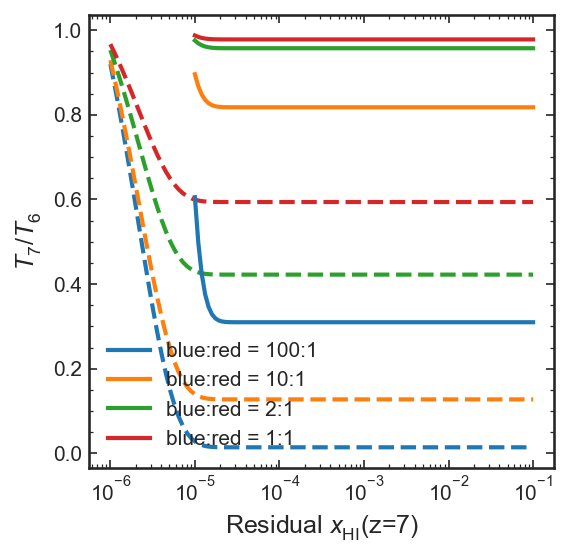

In [182]:
xHI_6_test = [1e-6, 1e-5]
ls = ['dashed', 'solid']
c  = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for i, xHI_6 in enumerate(xHI_6_test):
    xHI_tab = np.logspace(np.log10(xHI_6), -1, 100)

    t6 = tau(xHI_6, z=6)
    t7 = tau(xHI_tab, z=7)

    R = 1
    for rr, R in enumerate([0.01, 0.1, 0.5, 1]):
        ratio = (np.exp(-t7) + R) / (np.exp(-t6) + R)
        
        if i == 1:
            label = label='blue:red = %.0f:1' % (1/R)
        else:
            label = None
        plt.semilogx(xHI_tab, ratio, ls=ls[i], c=c[rr], label=label)

plt.legend()
plt.xlabel('Residual '+xHI_lab+'(z=7)')
plt.ylabel('$T_7/T_6$')